<a href="https://colab.research.google.com/github/siddharthchd/Tensorflow_Developer/blob/main/lessons/lesson_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 10)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4964 - accuracy: 0.8273
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2961 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2575 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9076
Epoch 10/10
313/313

Now using ConvNets 

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_lables) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation = 'softmax')

])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs = 10)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [4]:
print(test_lables[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


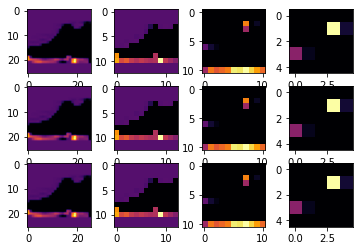

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_models = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0, 4):

    f1 = activation_models.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[0, x].grid(False)
    f2 = activation_models.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[1, x].grid(False)
    f3 = activation_models.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[2, x].grid(False)